In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# download from https://evictionlab.org/get-the-data/
# Choose VA => choose "all.csv" (Change the file name to 'VA.csv')
df = pd.read_csv('VA.csv')

In [3]:
df.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'imputed', 'subbed'],
      dtype='object')

In [4]:
df.shape

(133196, 26)

In [5]:
df_clean = df.dropna(axis=0, how='any')

In [6]:
df_clean.shape

(105830, 26)

In [7]:
df_clean = df_clean[df_clean['eviction-rate']<100]

In [8]:
df_clean.shape

(105782, 26)

In [9]:
df_county=df_clean[(df_clean['parent-location'] != 'USA') & (df_clean['parent-location'] != 'Virginia')]

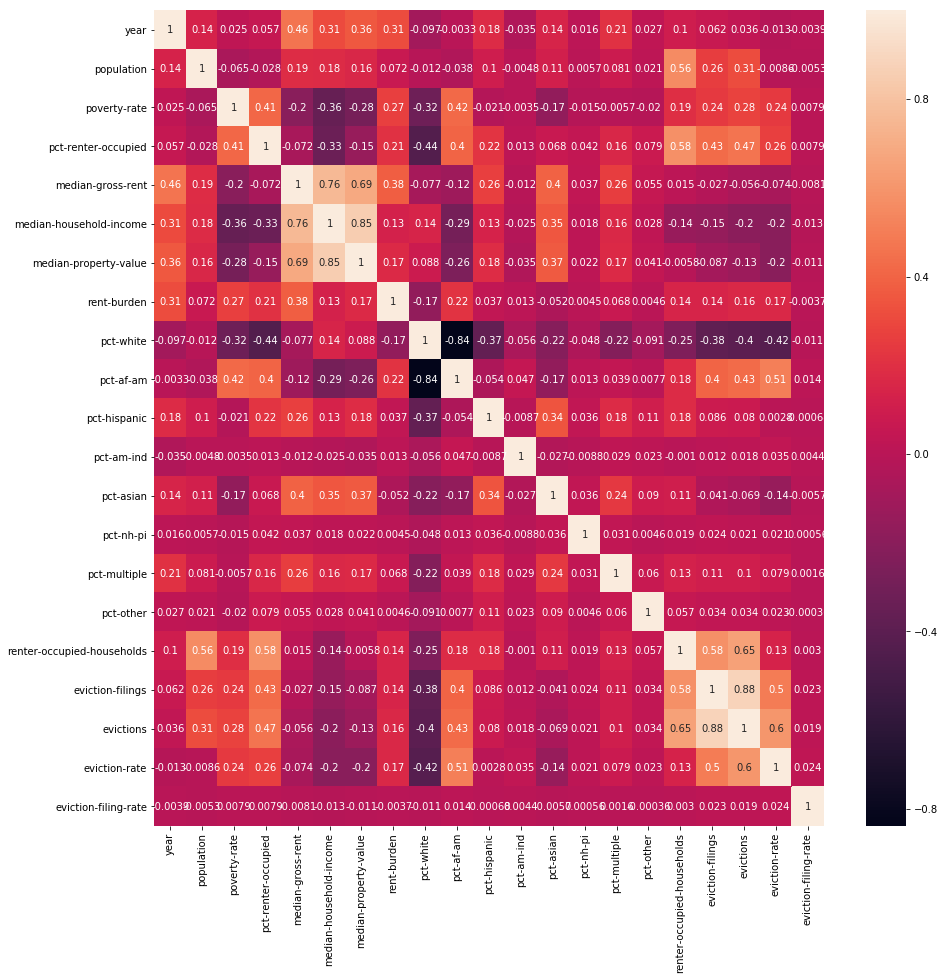

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df_county.drop(['GEOID','name','parent-location','imputed','subbed'],axis=1).corr(),annot=True)

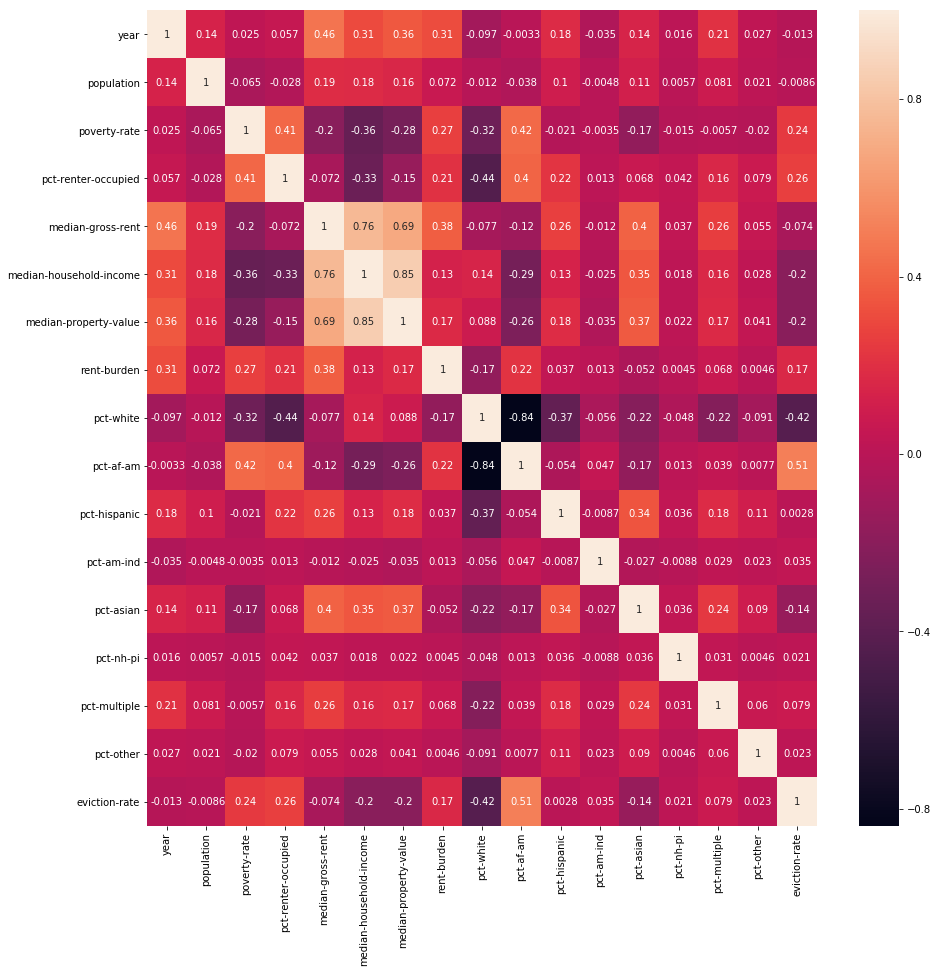

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df_county.drop(['GEOID','name','parent-location','imputed','subbed','eviction-filings','evictions','eviction-filing-rate',
                           'renter-occupied-households'],axis=1).corr(),annot=True)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
X = df_county.drop(['GEOID','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households'],axis=1)
y = df_county['eviction-rate']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
rfc = RandomForestRegressor(n_estimators=10)

In [16]:
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
predictions = rfc.predict(X_test)

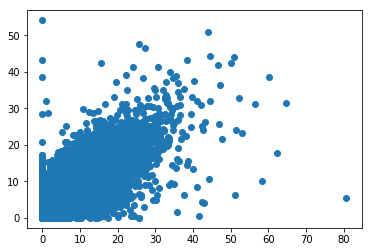

In [18]:
plt.scatter(y_test,predictions)

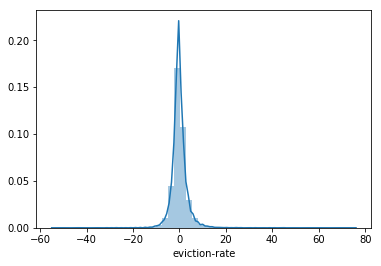

In [19]:
sns.distplot((y_test-predictions),bins=50);

In [20]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))

Training set score: 0.9298306770
Test set score: 0.6237095827


In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.14683879793
MSE: 11.1748255488
RMSE: 3.34287683722


Feature ranking:
1. feature 9 (pct-af-am) (0.278291)
2. feature 0 (year) (0.124139)
3. feature 3 (pct-renter-occupied) (0.067958)
4. feature 8 (pct-white) (0.065460)
5. feature 6 (median-property-value) (0.064228)
6. feature 1 (population) (0.049046)
7. feature 4 (median-gross-rent) (0.047516)
8. feature 5 (median-household-income) (0.046926)
9. feature 12 (pct-asian) (0.046467)
10. feature 7 (rent-burden) (0.043187)
11. feature 14 (pct-multiple) (0.038546)
12. feature 2 (poverty-rate) (0.037708)
13. feature 10 (pct-hispanic) (0.037353)
14. feature 11 (pct-am-ind) (0.024700)
15. feature 15 (pct-other) (0.016722)
16. feature 13 (pct-nh-pi) (0.011752)


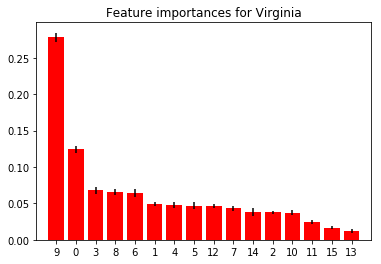

In [22]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Virginia")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Elliminate Some other features

In [23]:
X = df_county.drop(['GEOID','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','pct-white','population','median-household-income'],axis=1)
y = df_county['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=10)
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Training set score: 0.9298691927
Test set score: 0.6223838532
MAE: 2.15542087805
MSE: 11.2141961918
RMSE: 3.3487603963


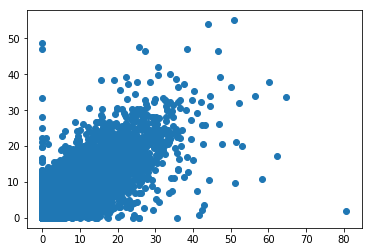

In [24]:
predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)

print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Feature ranking:
1. feature 6 (pct-af-am) (0.319217)
2. feature 0 (year) (0.128908)
3. feature 2 (pct-renter-occupied) (0.090908)
4. feature 4 (median-property-value) (0.088677)
5. feature 3 (median-gross-rent) (0.073574)
6. feature 5 (rent-burden) (0.063921)
7. feature 8 (pct-asian) (0.061705)
8. feature 7 (pct-hispanic) (0.060567)
9. feature 9 (pct-multiple) (0.056818)
10. feature 1 (poverty-rate) (0.055705)


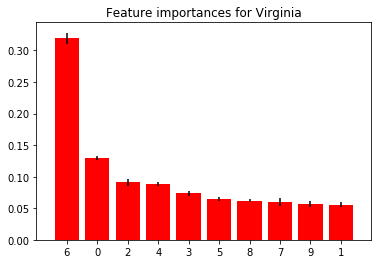

In [25]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Virginia")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Use pct-white instead of pct-af-am (then are highly corrrelated)

In [26]:
X = df_county.drop(['GEOID','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','pct-af-am','population','median-household-income'],axis=1)
y = df_county['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=10)
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Training set score: 0.9301129562
Test set score: 0.6264177901
MAE: 2.14457408548
MSE: 11.0943989853
RMSE: 3.33082557114


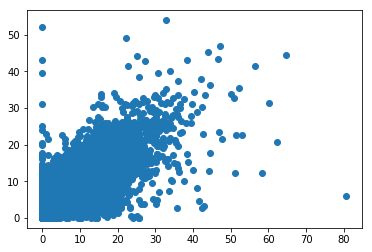

In [27]:
predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)

print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Feature ranking:
1. feature 6 (pct-white) (0.254756)
2. feature 0 (year) (0.128126)
3. feature 8 (pct-asian) (0.105618)
4. feature 2 (pct-renter-occupied) (0.099852)
5. feature 4 (median-property-value) (0.099667)
6. feature 3 (median-gross-rent) (0.074938)
7. feature 5 (rent-burden) (0.071141)
8. feature 7 (pct-hispanic) (0.061413)
9. feature 1 (poverty-rate) (0.053304)
10. feature 9 (pct-multiple) (0.051185)


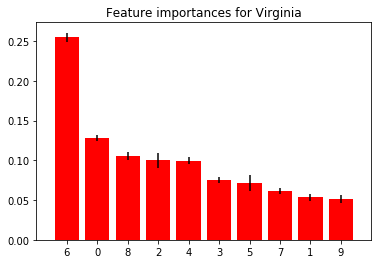

In [28]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Virginia")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Use pct-white race only

In [29]:
X = df_county.drop(['GEOID','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','pct-af-am','population','median-household-income','pct-hispanic','pct-multiple','pct-asian'],axis=1)
y = df_county['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=10)
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Training set score: 0.9283119363
Test set score: 0.6122159233
MAE: 2.19455036762
MSE: 11.5161566924
RMSE: 3.39354632978


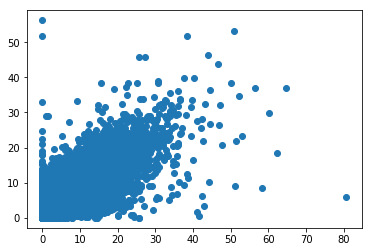

In [30]:
predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)

print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Feature ranking:
1. feature 6 (pct-white) (0.272199)
2. feature 4 (median-property-value) (0.166608)
3. feature 0 (year) (0.132884)
4. feature 2 (pct-renter-occupied) (0.121738)
5. feature 5 (rent-burden) (0.113322)
6. feature 3 (median-gross-rent) (0.109199)
7. feature 1 (poverty-rate) (0.084049)


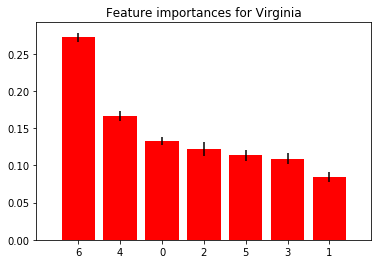

In [31]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Virginia")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Use pct-af-am race only

In [32]:
X = df_county.drop(['GEOID','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','pct-white','population','median-household-income','pct-hispanic','pct-multiple','pct-asian'],axis=1)
y = df_county['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=10)
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Training set score: 0.9277785434
Test set score: 0.6222139419
MAE: 2.17111729967
MSE: 11.2192421071
RMSE: 3.34951371203


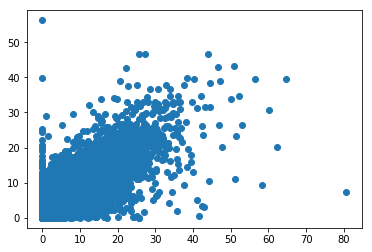

In [33]:
predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)

print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Feature ranking:
1. feature 6 (pct-af-am) (0.343921)
2. feature 0 (year) (0.132325)
3. feature 4 (median-property-value) (0.122704)
4. feature 2 (pct-renter-occupied) (0.120981)
5. feature 3 (median-gross-rent) (0.115153)
6. feature 5 (rent-burden) (0.084052)
7. feature 1 (poverty-rate) (0.080864)


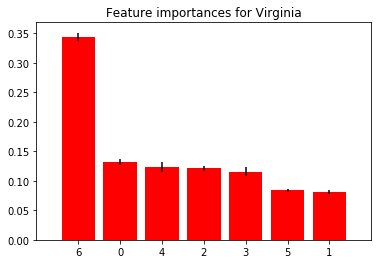

In [34]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Virginia")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [35]:
ds_importances = pd.Series(importances, name='importances')
ds_std = pd.Series(std, name='std')
ds_columns = pd.Series(X.columns,name='features')
Results = pd.concat([ds_importances, ds_std,ds_columns], axis=1)
Results.to_csv('VA_PreliminaryResults.csv')

# Use pct-hispanic race only

In [36]:
X = df_county.drop(['GEOID','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','pct-white','population','median-household-income','pct-af-am','pct-multiple','pct-asian'],axis=1)
y = df_county['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=10)
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Training set score: 0.9272706843
Test set score: 0.6078247186
MAE: 2.20606300294
MSE: 11.6465638039
RMSE: 3.41270622878


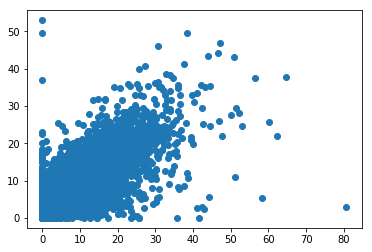

In [37]:
predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)

print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Feature ranking:
1. feature 4 (median-property-value) (0.190505)
2. feature 2 (pct-renter-occupied) (0.189799)
3. feature 0 (year) (0.144937)
4. feature 3 (median-gross-rent) (0.129935)
5. feature 5 (rent-burden) (0.129003)
6. feature 1 (poverty-rate) (0.113873)
7. feature 6 (pct-hispanic) (0.101948)


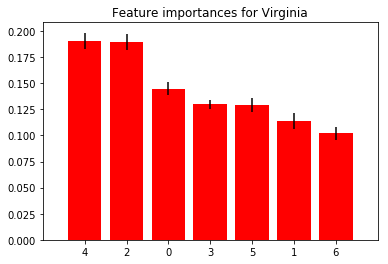

In [38]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Virginia")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()